<a href="https://colab.research.google.com/github/leejyy/Project/blob/main/S%26P500CompaniesStatistcalAnalysis_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Statistical Analysis with S&P companies' fianancial data

In [1]:
import pandas
import numpy
import matplotlib.pyplot as plt # Using it for data visualization
import seaborn                  # Using it for data visualization 
import statsmodels.api as sm    # Using it for statistical packages

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data=pandas.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/financials.csv')

In [4]:
type(data) # 'data' is pandas data frame.
print(len(data))        # the number of rows
print(len(data.columns))# the number of columns

505
14


In [5]:
# Counting qualitative data = value_counts (Frequency distribution)


Sym_count = data["Symbol"].value_counts(sort=False) # Count symbol of each S&P 500 company which is unique; therefore, there is only one for each company.
Nam_count = data["Name"].value_counts(sort=False)   # Unique
Sec_count = data["Sector"].value_counts(sort=False) # Count the number of each sector
print(Sym_count, Nam_count, Sec_count, sep = '\n\n' )

MMM     1
AOS     1
ABT     1
ABBV    1
ACN     1
       ..
XYL     1
YUM     1
ZBH     1
ZION    1
ZTS     1
Name: Symbol, Length: 505, dtype: int64

3M Company                1
A.O. Smith Corp           1
Abbott Laboratories       1
AbbVie Inc.               1
Accenture plc             1
                         ..
Xylem Inc.                1
Yum! Brands Inc           1
Zimmer Biomet Holdings    1
Zions Bancorp             1
Zoetis                    1
Name: Name, Length: 505, dtype: int64

Industrials                   67
Health Care                   61
Information Technology        70
Consumer Discretionary        84
Utilities                     28
Financials                    68
Materials                     25
Real Estate                   33
Consumer Staples              34
Energy                        32
Telecommunication Services     3
Name: Sector, dtype: int64


In [6]:
print(data.columns) # the first rows which are names of each columns (variables)

Index(['Symbol', 'Name', 'Sector', 'Price', 'Price/Earnings', 'Dividend Yield',
       'Earnings/Share', '52 Week Low', '52 Week High', 'Market Cap', 'EBITDA',
       'Price/Sales', 'Price/Book', 'SEC Filings'],
      dtype='object')


In [7]:
type(data)

pandas.core.frame.DataFrame

In [8]:
data.head() # To show the 5 rows(default) of data 

,Symbol,Name,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book,SEC Filings
0,MMM,3M Company,Industrials,222.89,24.31,2.332862,7.92,259.77,175.490,1.387210e+11,9.048000e+09,4.390271,11.34,http://www.sec.gov/cgi-bin/browse-edgar?action...
1,AOS,A.O. Smith Corp,Industrials,60.24,27.76,1.147959,1.70,68.39,48.925,1.078342e+10,6.010000e+08,3.575483,6.35,http://www.sec.gov/cgi-bin/browse-edgar?action...
2,ABT,Abbott Laboratories,Health Care,56.27,22.51,1.908982,0.26,64.60,42.280,1.021210e+11,5.744000e+09,3.740480,3.19,http://www.sec.gov/cgi-bin/browse-edgar?action...
3,ABBV,AbbVie Inc.,Health Care,108.48,19.41,2.499560,3.29,125.86,60.050,1.813860e+11,1.031000e+10,6.291571,26.14,http://www.sec.gov/cgi-bin/browse-edgar?action...
4,ACN,Accenture plc,Information Technology,150.51,25.47,1.714470,5.44,162.60,114.820,9.876586e+10,5.643228e+09,2.604117,10.62,http://www.sec.gov/cgi-bin/browse-edgar?action...


In [9]:
df_show = data.groupby(['Sector'])['Price'].mean()
df_show

Sector
Consumer Discretionary        124.034524
Consumer Staples               79.764118
Energy                         57.887500
Financials                     89.056029
Health Care                   132.515738
Industrials                   116.887612
Information Technology        119.242857
Materials                     102.386800
Real Estate                    88.712727
Telecommunication Services     33.603333
Utilities                      55.194643
Name: Price, dtype: float64

In [10]:
show = pandas.DataFrame(df_show)
show.rename({'Sector': 'Sector','Price': 'Avg Price'}, axis=1)

,Avg Price
Sector,
Consumer Discretionary,124.034524
Consumer Staples,79.764118
Energy,57.887500
Financials,89.056029
Health Care,132.515738
Industrials,116.887612
Information Technology,119.242857
Materials,102.386800
Real Estate,88.712727


In [11]:
# To show descriptive statistics

data['Sector'].describe()

count                        505
unique                        11
top       Consumer Discretionary
freq                          84
Name: Sector, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text major ticklabel objects>)

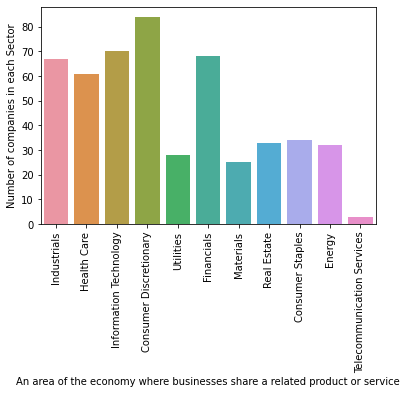

In [12]:
seaborn.countplot(x='Sector', data=data)
plt.xlabel("An area of the economy where businesses share a related product or service")
plt.ylabel("Number of companies in each Sector")
plt.xticks(rotation = 90)

In [13]:
print(Sec_count, sep = '\n\n' )

Industrials                   67
Health Care                   61
Information Technology        70
Consumer Discretionary        84
Utilities                     28
Financials                    68
Materials                     25
Real Estate                   33
Consumer Staples              34
Energy                        32
Telecommunication Services     3
Name: Sector, dtype: int64


In [14]:
# Convert to Numeric

data["Price"]=pandas.to_numeric(data["Price"])                           # Price: Price per share of the company
data["Price/Earnings"]=pandas.to_numeric(data["Price/Earnings"])         # Price/Earnings: The ratio of a company’s share price to its earnings per share
data["Dividend Yield"]=pandas.to_numeric(data["Dividend Yield"])         # Dividend Yield: The ratio of the annual dividends per share divided by the price per share
data["Earnings/Share"]=pandas.to_numeric(data["Earnings/Share"])         # Earnings/Share: A company’s profit divided by the number of shares of its stock
data["52 Week Low"]=pandas.to_numeric(data["52 Week Low"])               # 52 Week Low: The annual low of a company’s share price
data["52 Week High"]=pandas.to_numeric(data["52 Week High"])             # 52 Week High: The annual high of a company’s share price
data["Market Cap"]=pandas.to_numeric(data["Market Cap"])                 # Market Cap: The market value of a company’s shares (calculated as share price x number of shares)
data["EBITDA"]=pandas.to_numeric(data["EBITDA"])                         # EBITDA: A company’s earnings before interest, taxes, depreciation, and amortization; often used as a proxy for its profitability
data["Price/Sales"]=pandas.to_numeric(data["Price/Sales"])               # Price/Sales: A company’s market cap divided by its total sales or revenue over the past year
data["Price/Book"]=pandas.to_numeric(data["Price/Book"])                 # Price/Book: A company’s price per share divided by its book value

In [15]:
# Descriptive statistics
data['Price'].describe()


count     505.000000
mean      103.830634
std       134.427636
min         2.820000
25%        46.250000
50%        73.920000
75%       116.540000
max      1806.060000
Name: Price, dtype: float64

In [16]:
# Correlation matrix
# Depedent variable: Price and all other predictors

data.corr()

,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book
Price,1.000000,0.194761,-0.244630,0.591061,0.995076,0.982787,0.406474,0.180321,0.181625,0.023637
Price/Earnings,0.194761,1.000000,-0.181330,0.004570,0.185356,0.144700,0.131381,0.002950,0.188558,0.000366
Dividend Yield,-0.244630,-0.181330,1.000000,-0.077235,-0.244426,-0.207953,-0.021794,0.126133,-0.077724,0.089369
Earnings/Share,0.591061,0.004570,-0.077235,1.000000,0.588595,0.604894,0.194063,0.180583,-0.036178,0.032254
52 Week Low,0.995076,0.185356,-0.244426,0.588595,1.000000,0.984853,0.398504,0.176277,0.188823,0.023322
52 Week High,0.982787,0.144700,-0.207953,0.604894,0.984853,1.000000,0.375588,0.179666,0.173721,0.017794
Market Cap,0.406474,0.131381,-0.021794,0.194063,0.398504,0.375588,1.000000,0.771344,0.095249,0.034411
EBITDA,0.180321,0.002950,0.126133,0.180583,0.176277,0.179666,0.771344,1.000000,-0.037175,0.035547
Price/Sales,0.181625,0.188558,-0.077724,-0.036178,0.188823,0.173721,0.095249,-0.037175,1.000000,0.012337
Price/Book,0.023637,0.000366,0.089369,0.032254,0.023322,0.017794,0.034411,0.035547,0.012337,1.000000


Text(0, 0.5, '52 Week Low: The annual high and low of a company’s share price')

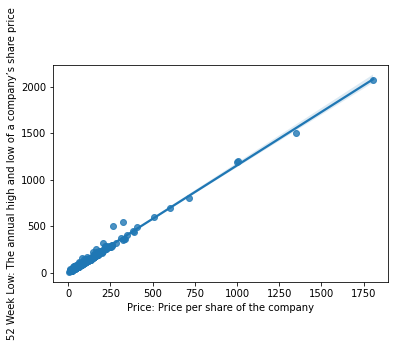

In [17]:
# Regression data visualization
# Highest Positive correlation (Closest to 1)

seaborn.regplot(x='Price', y='52 Week Low', data=data, fit_reg=True)
plt.xlabel("Price: Price per share of the company") 
plt.ylabel("52 Week Low: The annual high and low of a company’s share price")

In [18]:
# Regression Result for Postivie correlation
result_52Low = sm.OLS(data["Price"], data["52 Week Low"]).fit()
result_52Low.summary()

# The coefficient between Price and 52 Week Low is 0.8555 on the result.
# It means that one unit change in stock price results in 0.8555 unit change in 52 Week Low. 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.994
Model:                            OLS   Adj. R-squared (uncentered):              0.994
Method:                 Least Squares   F-statistic:                          8.061e+04
Date:                Sun, 27 Feb 2022   Prob (F-statistic):                        0.00
Time:                        23:45:33   Log-Likelihood:                         -2026.4
No. Observations:                 505   AIC:                                      4055.
Df Residuals:                     504   BIC:                                      4059.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
52 Week Low     0.8555      0.003    283.927      0.000       0.850       0.861
==============================================================================
Omnibus:                      636.338   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            97440.296
Skew:                          -5.979   Prob(JB):                         0.00
Kurtosis:                      69.991   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0, 0.5, 'Dividend Yield: The ratio of the annual dividends per share divided by the price')

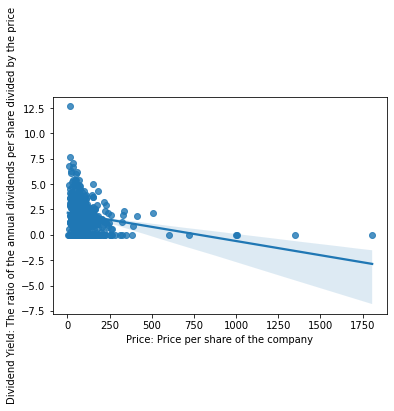

In [19]:
# Regression data visualization
# Negative correlation (Closest to -1)

seaborn.regplot(x='Price', y='Dividend Yield', data=data, fit_reg=True)
plt.xlabel("Price: Price per share of the company") 
plt.ylabel("Dividend Yield: The ratio of the annual dividends per share divided by the price")

In [20]:
# Regression Result for Negative correlation
result_Div = sm.OLS(data["Price"], data["Dividend Yield"]).fit()
result_Div.summary()

# The coefficient between Price and 52 Week Low is 24.5938 on the result.
# It means that one unit change in stock price results in 24.5938 unit change in Dividend Yield.  

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.125
Model:                            OLS   Adj. R-squared (uncentered):              0.123
Method:                 Least Squares   F-statistic:                              71.97
Date:                Sun, 27 Feb 2022   Prob (F-statistic):                    2.44e-16
Time:                        23:46:13   Log-Likelihood:                         -3275.7
No. Observations:                 505   AIC:                                      6553.
Df Residuals:                     504   BIC:                                      6558.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Dividend Yield    24.5938      2.899      8.484      0.000      18.898      30.289
==============================================================================
Omnibus:                      626.908   Durbin-Watson:                   1.671
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            67468.264
Skew:                           5.985   Prob(JB):                         0.00
Kurtosis:                      58.345   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Earnings/Share')

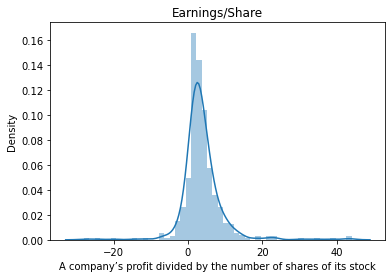

In [21]:
# Bar Chart Data Visualization (Positive Correlation)

seaborn.distplot(data['Earnings/Share'].dropna(), kde=True)
plt.xlabel("A company’s profit divided by the number of shares of its stock")
plt.title("Earnings/Share")

Text(0, 0.5, 'Earnings Per Share (EPS): A company’s profit divided by the number of shares of its stock')

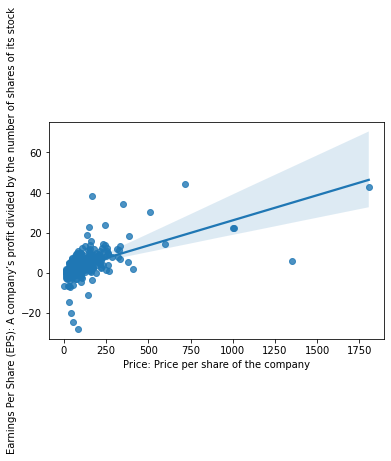

In [22]:
# Regression data visualization
# Positive correlation

seaborn.regplot(x='Price', y='Earnings/Share', data=data, fit_reg=True)
plt.xlabel("Price: Price per share of the company") 
plt.ylabel("Earnings Per Share (EPS): A company’s profit divided by the number of shares of its stock")

In [23]:
# Regression Result for Postivie correlation
result_52Low = sm.OLS(data["Price"], data["Earnings/Share"]).fit()
result_52Low.summary()

# The coefficient between Price and 52 Week Low is 18.1257 on the result.
# It means that one unit change in stock price results in 18.1257 unit change in 52 Week Low.  

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.529
Model:                            OLS   Adj. R-squared (uncentered):              0.528
Method:                 Least Squares   F-statistic:                              565.9
Date:                Sun, 27 Feb 2022   Prob (F-statistic):                    2.02e-84
Time:                        23:47:36   Log-Likelihood:                         -3119.3
No. Observations:                 505   AIC:                                      6241.
Df Residuals:                     504   BIC:                                      6245.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Earnings/Share    18.1257      0.762     23.789      0.000      16.629      19.623
==============================================================================
Omnibus:                      547.538   Durbin-Watson:                   1.804
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            43758.433
Skew:                           4.790   Prob(JB):                         0.00
Kurtosis:                      47.585   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""